# Regresión lineal

El Conjunto de Datos de Publicidad (Advertising Dataset) contiene información sobre el gasto en publicidad en diferentes medios y las ventas correspondientes de un producto.

In [77]:
# Importar librerías esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configurar opciones de visualización
%matplotlib inline
sns.set(style='whitegrid')

In [79]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

In [80]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA
Exploremos los datos

Revisemos la variable que queremos predecir y su corelación con las características.

¿Por qué hacemos esto?

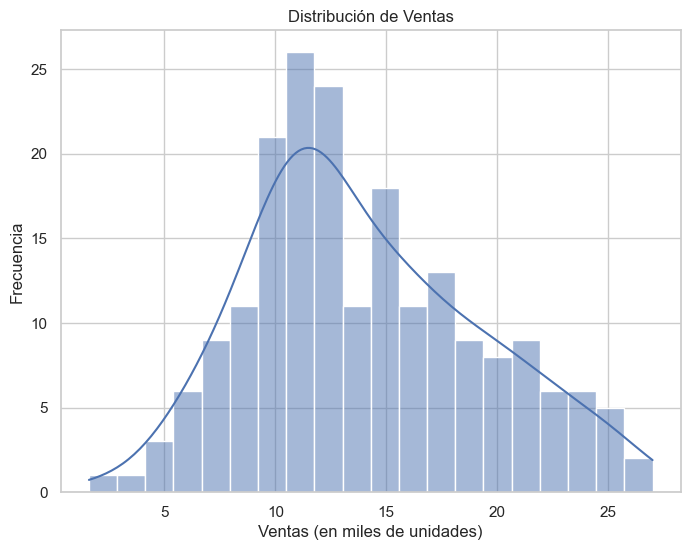

In [85]:
# Histograma de las ventas
plt.figure(figsize=(8,6))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas (en miles de unidades)')
plt.ylabel('Frecuencia')
plt.show()

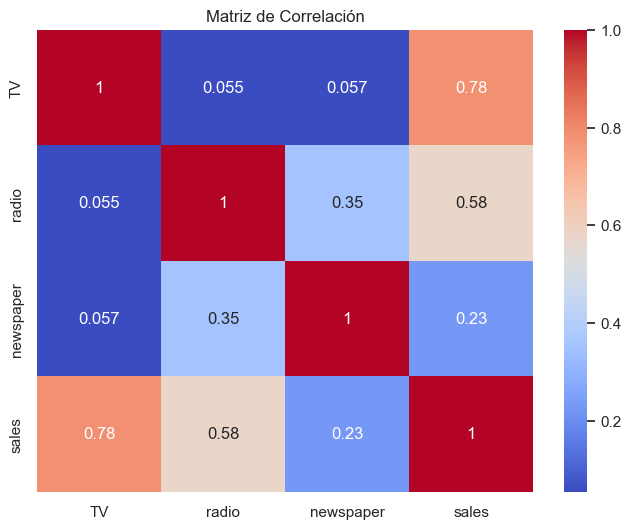

In [86]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observamos que las variables **TV** y **radio** tienen una **correlación alta** con las ventas, mientras que **newspaper** muestra una correlación más débil. Esto sugiere que **TV** y **radio** podrían ser **más relevantes** en nuestro modelo.

Veamos cómo se relacionan las variables de manera independiente con las ventas

¿Qué podemos observar aquí?

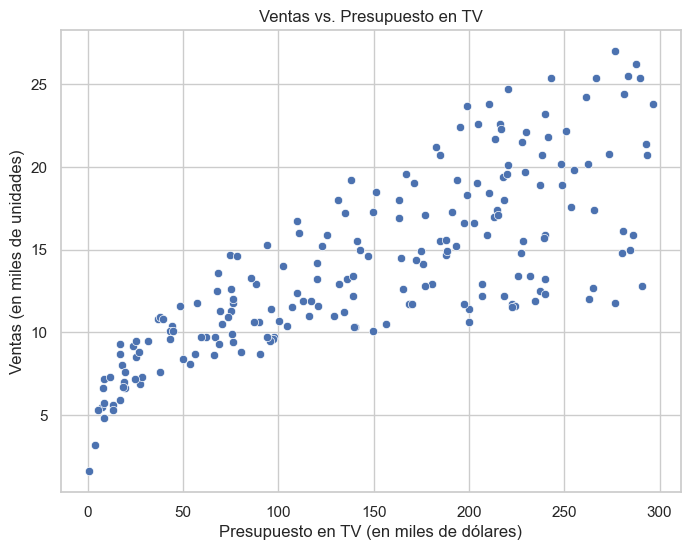

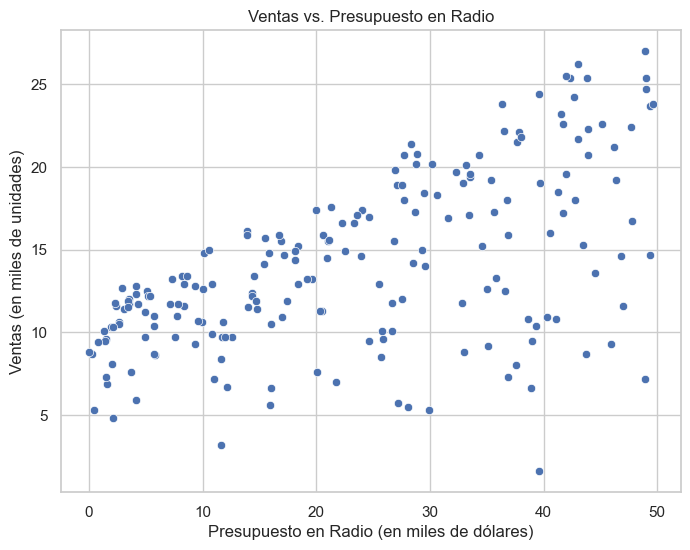

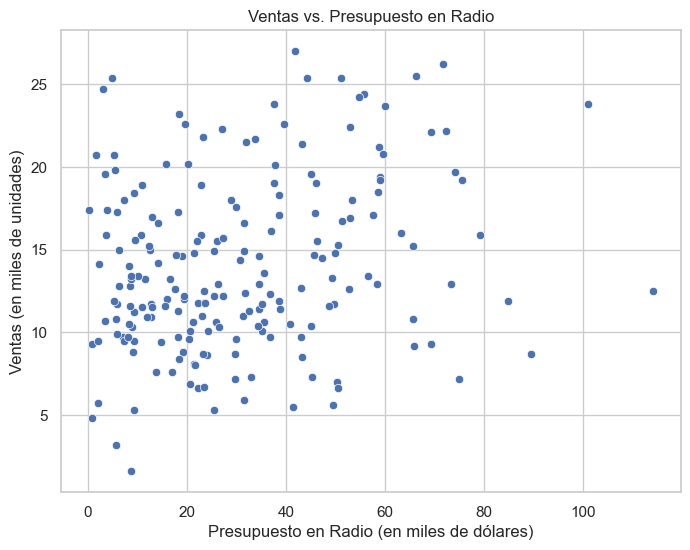

In [91]:
# Gráfico de dispersión de ventas vs. TV
plt.figure(figsize=(8,6))
sns.scatterplot(x='TV', y='sales', data=df)
plt.title('Ventas vs. Presupuesto en TV')
plt.xlabel('Presupuesto en TV (en miles de dólares)')
plt.ylabel('Ventas (en miles de unidades)')
plt.show()

# Gráfico de dispersión de ventas vs. radio
plt.figure(figsize=(8,6))
sns.scatterplot(x='radio', y='sales', data=df)
plt.title('Ventas vs. Presupuesto en Radio')
plt.xlabel('Presupuesto en Radio (en miles de dólares)')
plt.ylabel('Ventas (en miles de unidades)')
plt.show()

# Gráfico de dispersión de ventas vs. periodico
plt.figure(figsize=(8,6))
sns.scatterplot(x='newspaper', y='sales', data=df)
plt.title('Ventas vs. Presupuesto en Radio')
plt.xlabel('Presupuesto en Radio (en miles de dólares)')
plt.ylabel('Ventas (en miles de unidades)')
plt.show()



# Procesamiento

Preparemos los datos para el modelo

In [96]:
# Variables independientes
X = df[['TV', 'radio', 'newspaper']]  # Usamos todas las variables

# Variable dependiente
y = df['sales']

In [133]:
# Variables independientes
X = df[['TV', 'radio']]  # Usamos únicamente TV y Radio para mejores resultados

# Variable dependiente
y = df['sales']

Separamos los datos en un conjunto de prueba y uno de entrenamiento. 

Esto nos ayudará a entrenar el modelo y probar si funciona con datos que no ha visto antes el modelo y a los que no esta perfectamente ajustado.

In [136]:
X

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creación del Modelo

In [141]:
# Crear una instancia del modelo
model = LinearRegression()

In [143]:
model

LinearRegression()

In [145]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [149]:
# Obtener los coeficientes del modelo
coefficients = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': model.coef_
})
intercept = model.intercept_

coefficients

,Característica,Coeficiente
0,TV,0.047435
1,radio,0.175655


In [153]:
intercept

3.126553806941841

**Interpretemos los resultados**

    * Coeficiente de TV: Representa el cambio promedio en las ventas por cada incremento de $1,000 en el presupuesto de TV, manteniendo constante el presupuesto en radio y periódico en caso de tenerlo.

    * Coeficiente de radio: Representa el cambio promedio en las ventas por cada incremento de $1,000 en el presupuesto de radio, manteniendo constante el presupuesto en TV y periódico en caso de tenerlo.

    * Intercept: Valor esperado de las ventas cuando los presupuestos en TV, radio, y periódico en caso de tenerlo, son cero."


# Evaluación

Probemos el modelo con el conjunto de datos que separamos previamente y observemos cómo se comporta en estos

In [158]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [162]:
# Calcular el Error Cuadrático Medio (MSE) y la Raíz del MSE (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")


Error Cuadrático Medio (MSE): 4.4039
Raíz del Error Cuadrático Medio (RMSE): 2.0985
Coeficiente de Determinación (R^2): 0.7629


---

Un MSE más bajo indica un mejor ajuste del modelo a los datos.

El RMSE nos indica, en promedio, cuánto se desvía el valor predicho del valor real.

El $R^{2}$ varía entre 0 y 1.
    
    0: El modelo no explica ninguna variabilidad de la variable dependiente.
    
    1: El modelo explica toda la variabilidad de la variable dependiente.

Un valor más alto de $R^{2}$ indica un mejor ajuste del modelo.

Un MSE de 4.5031 significa que, en promedio, el cuadrado de las diferencias entre las ventas reales y las predichas es 4.5031 unidades al cuadrado.

Un RMSE de 2.1221 significa que, en promedio, nuestras predicciones de ventas tienen un error de aproximadamente 2,122 unidades (ya que las ventas están en miles de unidades).

Un $R^{2}$ de 0.7576 indica que el 75.76% de la variabilidad en las ventas se puede explicar por los presupuestos de publicidad en TV y Radio.
El restante 24.24% de la variabilidad se debe a otros factores no incluidos en el modelo o a variaciones aleatorias.

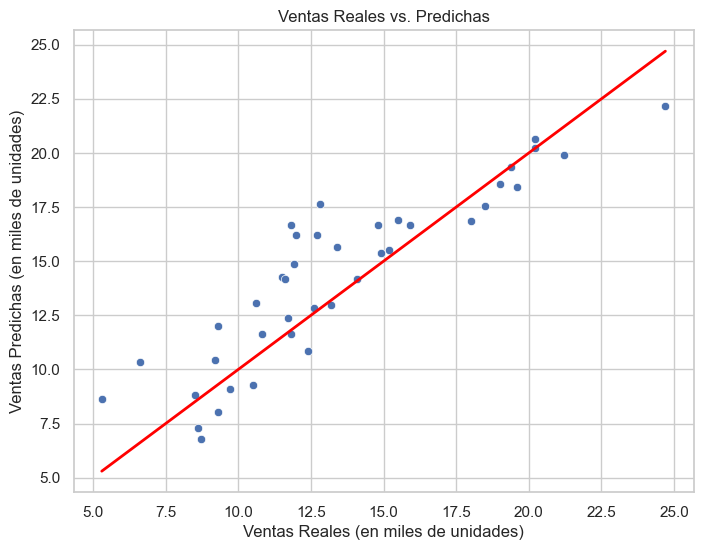

In [166]:
# Gráfico de valores reales vs. predicciones
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Ventas Reales (en miles de unidades)')
plt.ylabel('Ventas Predichas (en miles de unidades)')
plt.title('Ventas Reales vs. Predichas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

# Validación del modelo

Aplicaremos una validación cruzada para garantizar que el modelo sea bueno y no una coincidencia de segmentación de datos

**¿Qué es la validación cruzada?**

La validación cruzada es una técnica estadística utilizada para evaluar la capacidad de un modelo para predecir datos nuevos que no fueron utilizados en su entrenamiento. Consiste en dividir el conjunto de datos disponible en múltiples subconjuntos (llamados "folds") y realizar múltiples rondas de entrenamiento y validación.

El método más común es la validación cruzada k-fold, donde:

* k es el número de folds en los que se divide el conjunto de datos.
* En cada iteración, uno de los folds se utiliza como conjunto de validación y los k-1 folds restantes como conjunto de entrenamiento.
* Este proceso se repite k veces, cambiando el fold de validación en cada iteración.

In [173]:
# Realizar validación cruzada
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(f"Scores de validación cruzada (R^2): {scores}")
print(f"R^2 promedio: {scores.mean():.4f}")


Scores de validación cruzada (R^2): [0.88116273 0.91814589 0.92984129 0.82185938 0.8954055 ]
R^2 promedio: 0.8893


¿Cómo se distribuyen los residuos?

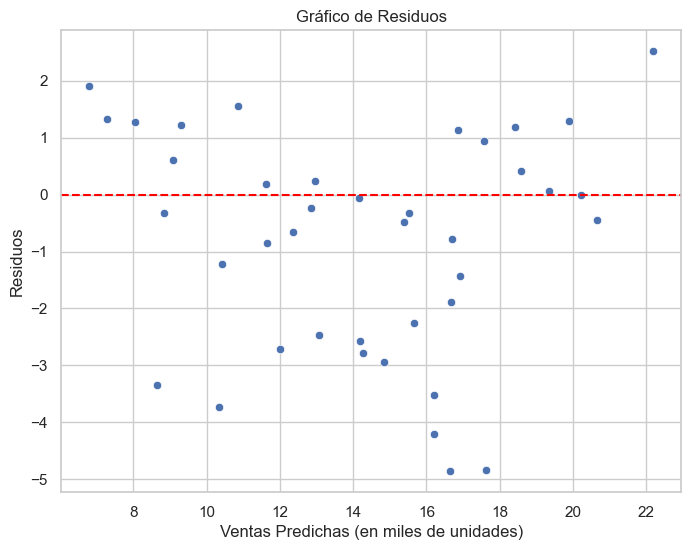

In [176]:
# Calcular residuos
residuals = y_test - y_pred

# Gráfico de residuos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Ventas Predichas (en miles de unidades)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()
